In [135]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [47]:
df = pd.read_csv('bank-full.csv', sep = ';')

In [57]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,0.256419,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,-0.437895,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,-0.446762,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,0.047205,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,-0.447091,0,0,2,5,8,198,1,-1,0,3,0


In [49]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### 1- check for null values and handle it


 ----> there are no null values in the dataset

In [51]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### 2- check if there are non-rational values 

In [52]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### 3- label encode data

In [53]:
enc = {}
for col in df.columns:
    if df[col].dtype == "object":
        enc[col] = LabelEncoder()
        df[col] = enc[col].fit_transform(df[col])

### 4- scale data

In [54]:
scaled = StandardScaler()   
df['balance'] = scaled.fit_transform(df['balance'].values.reshape(-1,1))

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null int64
marital      45211 non-null int64
education    45211 non-null int64
default      45211 non-null int64
balance      45211 non-null float64
housing      45211 non-null int64
loan         45211 non-null int64
contact      45211 non-null int64
day          45211 non-null int64
month        45211 non-null int64
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null int64
y            45211 non-null int64
dtypes: float64(1), int64(16)
memory usage: 5.9 MB


### 5- draw correlation map

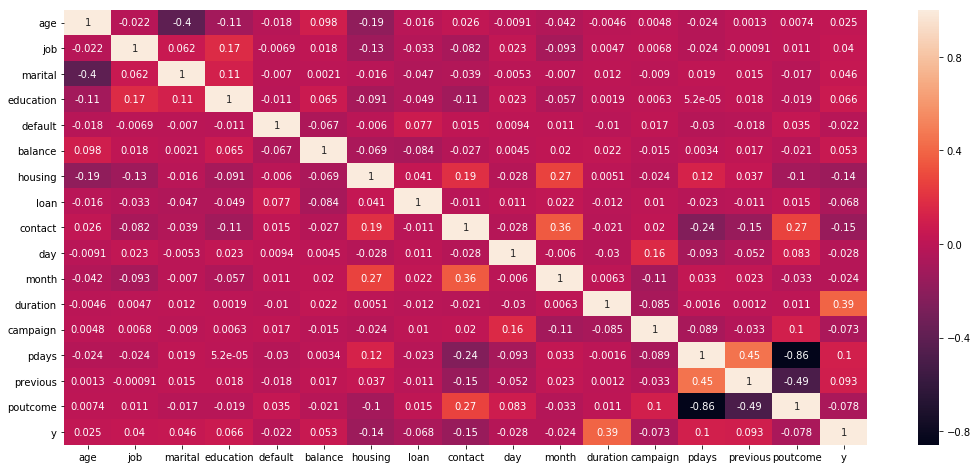

In [56]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(), annot = True)

### 6- split data into train and test sets

In [60]:
X=df.drop('y',axis=1).values
y=df['y'].values

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.30)

### 7- use decision tree and random forest for data classification

### 8- train models and evaluate them using Accuracy,confusion matrix, f1-score,.....etc

## Before optimizing the parameters

In [81]:
# Decision Tree

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_predicted_bo = dt.predict(X_test)

print('Accuracy:', accuracy_score(y_test, dt_predicted_bo))
print('Confusion Matrix:' + '\n', confusion_matrix(y_test, dt_predicted_bo))
print('F1 Score: (the nearer to 1 the better!)', f1_score(y_test, dt_predicted_bo))

Accuracy: 0.8760690061928634
Confusion Matrix:
 [[11093   848]
 [  833   790]]
F1 Score: (the nearer to 1 the better!) 0.4845139527752223


In [82]:
# Random Forest
rf = RandomForestClassifier(random_state = 5)
rf.fit(X_train, y_train)
rf_predicted_bo = rf.predict(X_test)

print('Accuracy:',accuracy_score(y_test, rf_predicted_bo))
print('Confusion Matrix:' + '\n', confusion_matrix(y_test, rf_predicted_bo))
print('F1 Score: (the nearer to 1 the better!)', f1_score(y_test, rf_predicted_bo))

Accuracy: 0.9012090828664111
Confusion Matrix:
 [[11591   350]
 [  990   633]]
F1 Score: (the nearer to 1 the better!) 0.48580199539524177


### 9- use GridSearchCV to get the best parameters for the tree. (bonus)

In [123]:
param_grid = {'n_estimators': [1, 30], 'max_features': ['auto', 'log2'],
              'max_depth': [4, 8, 50], 'criterion': ['gini', 'entropy']}
model = RandomForestClassifier(random_state = 5)
GS_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

GS_model.fit(X_train, y_train)
GS_model.best_params_

{'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 'auto',
 'n_estimators': 1}

## Applying best parameters

In [144]:
opt_model = RandomForestClassifier(criterion = 'entropy', max_depth = 50, max_features = 'auto', n_estimators = 7)
opt_model.fit(X_train, y_train)
opt_predicted = opt_model.predict(X_test)


print('Accuracy:', accuracy_score(y_test, opt_predicted))
print('Confusion Matrix:' + '\n', confusion_matrix(y_test, opt_predicted))
print('F1 Score: (the nearer to 1 the better!)', f1_score(y_test, opt_predicted))

Accuracy: 0.8971542317900324
Confusion Matrix:
 [[11478   463]
 [  932   691]]
F1 Score: (the nearer to 1 the better!) 0.4976593446164927


## By applying the best parameters, the model didn't do much better!
## it went up a little in F1 Score but the accuracy went down 1 point